In [ ]:
"""Formaldehyde polaritonic potential energy surface"""

__authors__ = ["Jonathan J. Foley"]
__email__   = ["foleyj10@wpunj.edu]
__credits__ = ["Daniel G.A. Smith"]
__copyright__ = "(c) 2008-2020, The Psi4Education Developers"
__license__   = "BSD-3-Clause"
__date__      = "2021-01-10"

## Polaritonic surfaces of MgH+

In [1]:
import psi4
import numpy as np
from scipy import linalg as splinalg

from psi4.driver.procrouting.response.scf_response import tdscf_excitations

In [ ]:
# run across an H2O symmetric bond stretching surface
# 0.5 - 2.0 Angstroms, increments of 0.05, total of 31 geometries
# use H-H bond angle 104.5 degrees
# save geometry, nuclear charges (same across the surface), and scf energy as lists

### THIS DOES NOT PROPERLY SAVE THE PES OF THE FIRST 8 STATES ACROSS 30 GEOMETRIES AT
### THIS TIME!  I THINK THERE IS AN ISSUE WITH APPENDING THE POLES DATA TO THE ES ARRAY 
### AT THIS TIME
# set basis
psi4.set_options({
    'basis':'cc-pVDZ'
})

n_states = 4
n_geoms = 29
# initialize geometry list
geoms = []

# initialize energy list
Es = np.zeros((n_states+1, n_geoms))
# generate bond lengths
rs = []
for i in range(0,n_geoms):
    rs.append(1.1 + i*0.1)

#O
#C 1 1.2
#H 2 1.1 1 121.85
#H 2 1.1 1 121.85 3 180.0
# loop over bond lengths

# loop over bond lengths
ctr = 0
for i in rs:
    # generate a water molecule using a Z-matrix and set the O-H bond lengths
    # generate a water molecule using a Z-matrix and set the O-H bond lengths
    mol = psi4.geometry("""
    Mg
    H 1 """ + str(i) + """
    symmetry c1
    1 1
    """)
    # save the geometry
    geoms.append(mol.geometry().to_array())
    psi4.set_options({
    'save_jk': True,
    })

    

    
    # calculate and save the energy
    #Es.append(psi4.energy('scf'))
    e, wfn = psi4.energy("PBE0-13/cc-pVDZ", return_wfn=True, molecule=mol)
    
    res = tdscf_excitations(wfn, states=4, triplets = "NONE")
    
    # get poles and residues to plot OPA and ECD spectra
    poles = [r["EXCITATION ENERGY"] for r in res]
    Es[0,ctr] = e
    for j in range(0, n_states):
        Es[j+1,ctr] = e + poles[j]
    print(i, Es[:,ctr])
    ctr += 1
    
#e, wfn = psi4.energy("HF/cc-pvdz", return_wfn=True, molecule=h2o2)
#res = tdscf_excitations(wfn, states=10)

1.1 [-200.12835658 -199.8850034  -199.82923906 -199.82923906 -199.69972309]
1.2000000000000002 [-200.18371479 -199.94739699 -199.88892028 -199.88892028 -199.75886618]
1.3 [-200.21909845 -199.99077106 -199.93036789 -199.93036789 -199.79982795]
1.4000000000000001 [-200.24068912 -200.02078599 -199.95902678 -199.95902678 -199.8287337 ]
1.5 [-200.25272893 -200.04137215 -199.97868336 -199.97868336 -199.84985234]
1.6 [-200.25807961 -200.05516905 -199.99188895 -199.99188895 -199.86597453]
1.7000000000000002 [-200.25870407 -200.06395581 -200.00035752 -200.00035752 -199.87880011]
1.8000000000000003 [-200.25599563 -200.0689973  -200.00530744 -200.00530744 -199.88930926]
1.9000000000000001 [-200.25097277 -200.07123601 -200.00761923 -200.00761923 -199.89805328]
2.0 [-200.24439161 -200.07139234 -200.00795006 -200.00795006 -199.90538001]
2.1 [-200.23681651 -200.07004194 -200.00680919 -200.00680919 -199.9115687 ]
2.2 [-200.22866875 -200.06764264 -200.00459194 -200.00459194 -199.91682783]
2.30000000000

In [8]:
# run across an H2O symmetric bond stretching surface
# 0.5 - 2.0 Angstroms, increments of 0.05, total of 31 geometries
# use H-H bond angle 104.5 degrees
# save geometry, nuclear charges (same across the surface), and scf energy as lists

### THIS DOES NOT PROPERLY SAVE THE PES OF THE FIRST 8 STATES ACROSS 30 GEOMETRIES AT
### THIS TIME!  I THINK THERE IS AN ISSUE WITH APPENDING THE POLES DATA TO THE ES ARRAY 
### AT THIS TIME
# set basis
psi4.set_options({
    'basis':'cc-pVDZ'
})

n_states = 4
n_geoms = 29
# initialize geometry list
geoms = []

# initialize energy list
Es = np.zeros((n_states+1, n_geoms))
# generate bond lengths
rs = []
for i in range(0,n_geoms):
    rs.append(1.1 + i*0.1)

#O
#C 1 1.2
#H 2 1.1 1 121.85
#H 2 1.1 1 121.85 3 180.0
# loop over bond lengths

# loop over bond lengths
ctr = 0
for i in rs:
    # generate a water molecule using a Z-matrix and set the O-H bond lengths
    # generate a water molecule using a Z-matrix and set the O-H bond lengths
    mol = psi4.geometry("""
    Mg
    H 1 """ + str(i) + """
    symmetry c1
    1 1
    """)
    # save the geometry
    geoms.append(mol.geometry().to_array())
    psi4.set_options({
    'save_jk': True,
    })

    

    
    # calculate and save the energy
    #Es.append(psi4.energy('scf'))
    e, wfn = psi4.energy("PBE0-13/cc-pVDZ", return_wfn=True, molecule=mol)
    
    res = tdscf_excitations(wfn, states=4, triplets = "NONE")
    
    # get poles and residues to plot OPA and ECD spectra
    poles = [r["EXCITATION ENERGY"] for r in res]
    Es[0,ctr] = e
    for j in range(0, n_states):
        Es[j+1,ctr] = e + poles[j]
    print(i, Es[:,ctr])
    ctr += 1
    
#e, wfn = psi4.energy("HF/cc-pvdz", return_wfn=True, molecule=h2o2)
#res = tdscf_excitations(wfn, states=10)

1.1 [-200.12835658 -199.8850034  -199.82923906 -199.82923906 -199.69972309]
1.2000000000000002 [-200.18371479 -199.94739699 -199.88892028 -199.88892028 -199.75886618]
1.3 [-200.21909845 -199.99077106 -199.93036789 -199.93036789 -199.79982795]
1.4000000000000001 [-200.24068912 -200.02078599 -199.95902678 -199.95902678 -199.8287337 ]
1.5 [-200.25272893 -200.04137215 -199.97868336 -199.97868336 -199.84985234]
1.6 [-200.25807961 -200.05516905 -199.99188895 -199.99188895 -199.86597453]
1.7000000000000002 [-200.25870407 -200.06395581 -200.00035752 -200.00035752 -199.87880011]
1.8000000000000003 [-200.25599563 -200.0689973  -200.00530744 -200.00530744 -199.88930926]
1.9000000000000001 [-200.25097277 -200.07123601 -200.00761923 -200.00761923 -199.89805328]
2.0 [-200.24439161 -200.07139234 -200.00795006 -200.00795006 -199.90538001]
2.1 [-200.23681651 -200.07004194 -200.00680919 -200.00680919 -199.9115687 ]
2.2 [-200.22866875 -200.06764264 -200.00459194 -200.00459194 -199.91682783]
2.30000000000

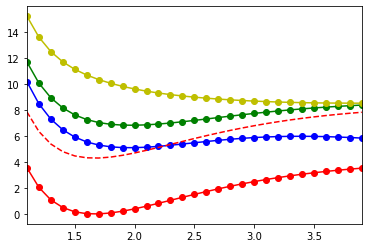

In [9]:
offset = 200.25870407
from matplotlib import pyplot as plt
plt.plot(rs[:29], Es[0,:29]*27.211+offset*27.211, 'ro-')
plt.plot(rs[:29], Es[1,:29]*27.211+offset*27.211, 'bo-')
plt.plot(rs[:29], Es[2,:29]*27.211+offset*27.211, 'go-')
plt.plot(rs[:29], Es[4,:29]*27.211+offset*27.211, 'yo-')
plt.plot(rs[:29], Es[0,:29]*27.211+offset*27.211+4.3, 'r--')
#plt.ylim(7,11)
plt.xlim(1.1,3.9)
plt.show()

- Fit each surface to a spline

- Define a photonic Hamiltonian 

- Define an interaction Hamiltonian

- Build H_tot and diagonalize at each geometry